# Segmentación de imágenes usando espacios de color

Importamos librerías:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import colorsys
from matplotlib import colors

from pathlib import Path

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

Definimos las funciones a utilizar:

In [3]:
def plot_image(img, title):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [4]:
def plot_images(img1, title1, img2, title2):
    fig = plt.figure(figsize=(6, 7))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title(title1)

    fig.add_subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(title2)

    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.show()

## Ej 1.a - Finding Nemo

### Espacios de color al leer imágenes

Guardamos en ``flags`` las posibles conversiones de espacios de colores que nos ofrece OpenCV:

In [5]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(f"len: {len(flags)}")
print(f"first 3: {flags[:3]}")

len: 374
first 3: ['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']


donde el ``2`` separa los espacios de colores origen y destino.

Al abrir la imagen del pez payaso, vemos que tiene los canales rojo y azul invertidos:

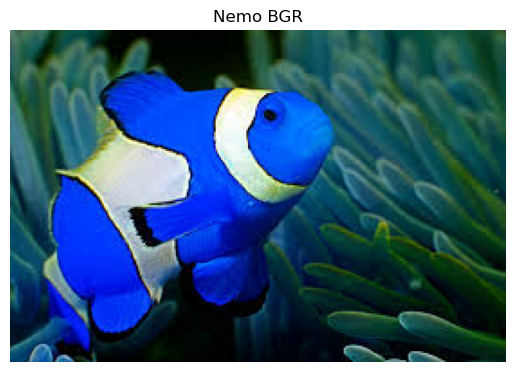

In [6]:
nemo_bgr = cv2.imread('./assets/nemo_images/nemo0.jpg')
plot_image(nemo_bgr, 'Nemo BGR')

Esto es porque OpenCV lee por default las imágenes en formato BGR. Podemos arreglarlo con ``cvtColor(image, flag)`` especificando el flag que convierte de BGR a RGB:

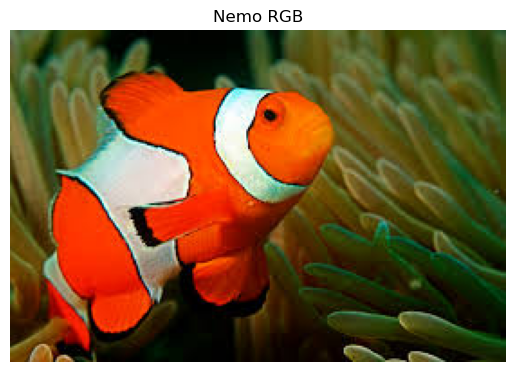

In [7]:
nemo_rgb = cv2.cvtColor(nemo_bgr, cv2.COLOR_BGR2RGB)
plot_image(nemo_rgb, 'Nemo RGB')

### RGB vs HSV

Leemos la imagen en formato HSV:

In [8]:
nemo_hsv = cv2.cvtColor(nemo_bgr, cv2.COLOR_BGR2HSV)

Comparamos la distribución de colores de los pixeles de los espacios de color de RGB y HSV:

In [9]:
def rgb_3d_scatter(img, title):
    r, g, b = cv2.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.title(title)
    plt.show()


In [10]:
def hsv_3d_scatter(img, title):
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    h, s, v = cv2.split(img)
    rgb_values = [
                    colorsys.hsv_to_rgb(h/179, s/255, v/255)
                    for h, s, v in zip(h.flatten(), s.flatten(), v.flatten())
                 ]
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=rgb_values, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.title(title)
    plt.show()

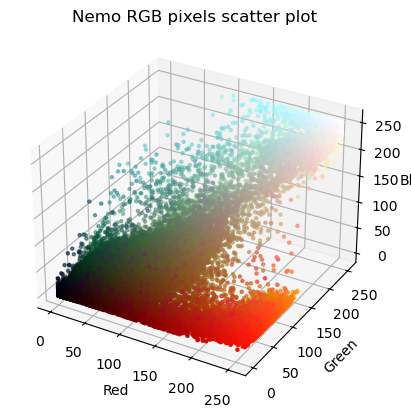

In [11]:
rgb_3d_scatter(nemo_rgb, 'Nemo RGB pixels scatter plot')

De esta forma, podemos notar por ejemplo que los pixeles naranjas con distintos niveles de brillo o saturación se encuentran repartidos en el espacio RGB, complicando el poder hallar un área definida que los englobe para separarlos del resto.

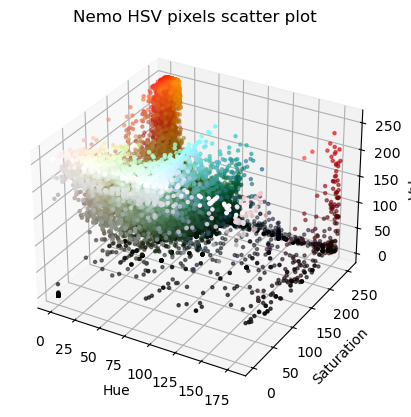

In [12]:
hsv_3d_scatter(nemo_hsv, 'Nemo HSV pixels scatter plot')

Con HSV podemos separar mejor los naranjas, ya que se encuentran localizados en un área determinada. Esta ventaja se debe a que el espacio RGB no tiene una separación clara entre la información de color y la de brillo, lo que puede complicar la segmentación cuando hay variaciones de iluminación como vimos con los naranjas. El canal Hue en HSV permite identificar colores con mayor precisión sin importar su nivel de brillo o saturación, permitiendo segmentar más facilmente.